# 4.15 用Basemap可视化地理数据

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


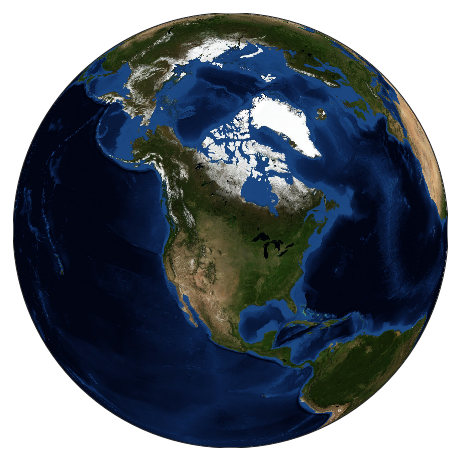

In [30]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(2.34727e+06,4.51808e+06,'Seattle')

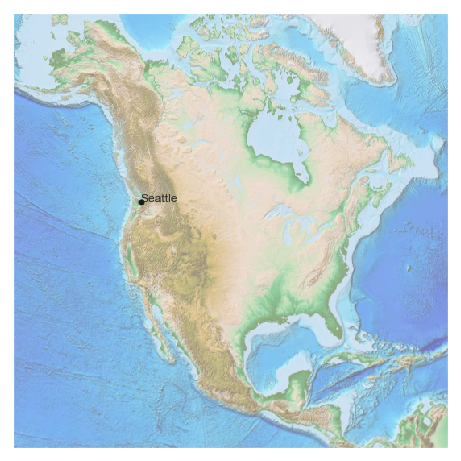

In [31]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

# 地图上的（经度，纬度）对应图上的（x, y）坐标
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12)

## 4.15.1 地图投影

首先定义一个可以画带经纬线地图的简便方法

In [32]:
from itertools import chain

In [33]:
def draw_map(m, scale=0.2):
    # 画地貌晕渲图
    m.shadedrelief(scale=scale)
    
    # 用字典表示经纬度
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # 字典的键是plt.Line2D示例
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 用循环将所有线设置成需要的样式
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        

1. 圆柱投影

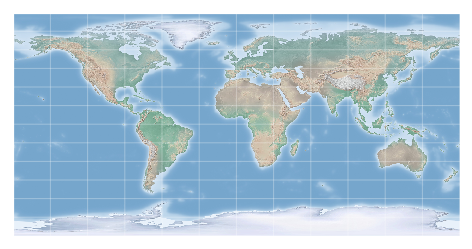

In [34]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None, llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

2. 伪圆柱投影

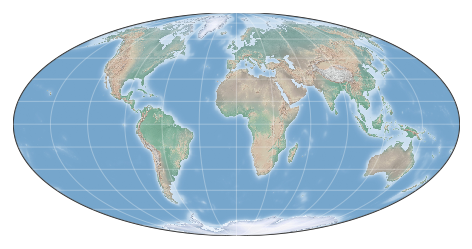

In [35]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None, lat_0=0, lon_0=0)
# m.shadedrelief(scale=0.2)
draw_map(m)

3. 透视投影

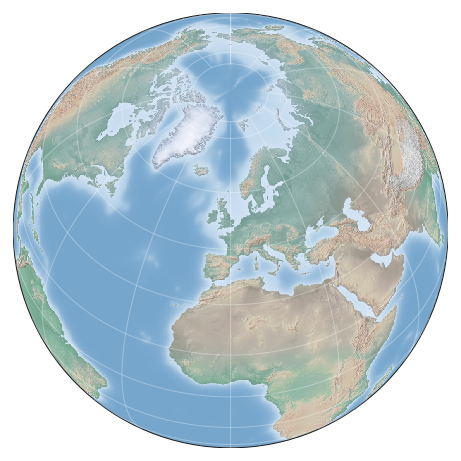

In [36]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=0)
draw_map(m)

4. 圆锥投影

圆锥投影和透视投影一样，适合显示较小与中等区域的地图

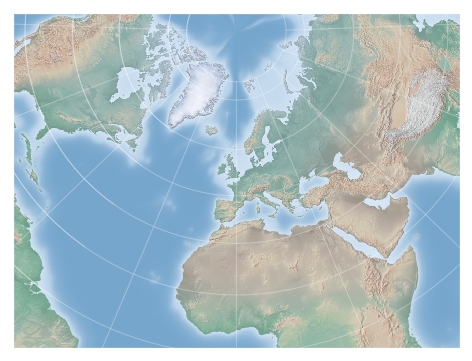

In [37]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, lon_0=0, lat_0=50, lat_1=45, lat_2=55, width=1.6E7, height=1.2E7)
draw_map(m)

5. 其他投影类型

## 4.15.2 画一个地图北京

绘制海岸线的示例，来看看两种不同分辨率的绘制效果。

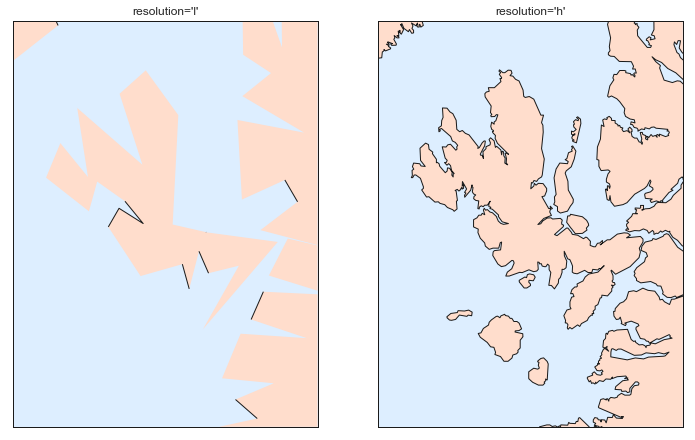

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2, width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

## 4.15.3 在地图上画数据

## 4.15.4 案例：美国加州城市数据

In [38]:
import pandas as pd

In [39]:
cities = pd.read_csv('./data/california_cities.csv')

In [40]:
# 提取需要的数据
lat = cities['latd'].values
lon = cities['longd'].values

In [42]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [43]:
population = cities['population_total'].values

In [44]:
type(population)

numpy.ndarray

In [45]:
area = cities['area_total_km2'].values

建立地图投影，绘制数据散点，并创建颜色条与图例

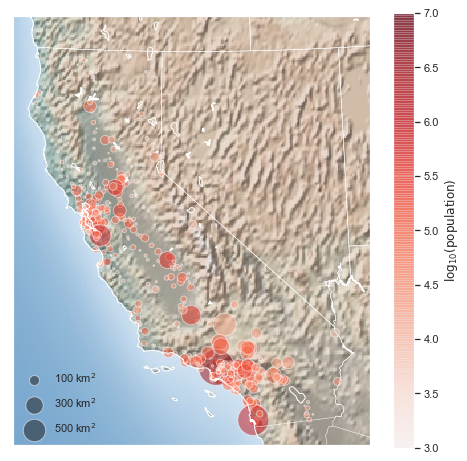

In [51]:
# 1. 绘制地图背景
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119, width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='white')
m.drawcountries(color='white')
m.drawstates(color='white')

# 2. 绘制城市数据散点，用颜色表示人口数据，用大小表示地域大小
m.scatter(lon, lat, latlon=True, c=np.log10(population), s=area, cmap='Reds', alpha=0.5, edgecolor='white')

# 3. 创建颜色条与实例
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# 用虚拟点绘制图例
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, edgecolor='white', label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

## 4.15.5 案例：地表温度数据

In [52]:
from netCDF4 import Dataset

In [53]:
data = Dataset('./data/gistemp250_GHCNv4.nc')

In [54]:
from netCDF4 import date2index
from datetime import datetime

In [55]:
timeindex = date2index(datetime(2014, 1, 15), data.variables['time'])

加载经度与纬度数据，并将气温也提取出来：

In [57]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

In [58]:
temp_anomaly

masked_array(
  data=[[0.949999988079071, 0.949999988079071, 0.949999988079071, ...,
         0.949999988079071, 0.949999988079071, 0.949999988079071],
        [0.949999988079071, 0.949999988079071, 0.949999988079071, ...,
         0.949999988079071, 0.949999988079071, 0.949999988079071],
        [0.949999988079071, 0.949999988079071, 0.949999988079071, ...,
         0.949999988079071, 0.949999988079071, 0.949999988079071],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=32767,
  dtype=float32)

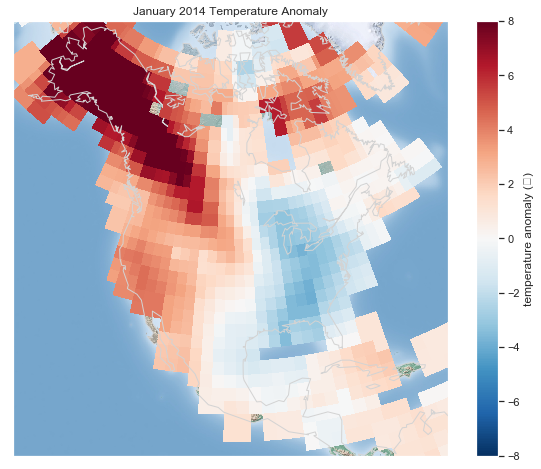

In [59]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c', width=8E6, height=8E6, lat_0=45, lon_0=-100)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly, latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (℃)')

# 4.16 用Seaborn做数据可视化

## 4.16.1 Seaborn与Matplotlib

In [60]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

创建一些随机游走的数据

In [61]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

画一个简易图形

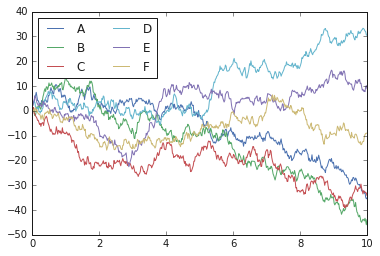

In [62]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [64]:
x.shape

(500,)

In [65]:
y.shape

(500, 6)

In [66]:
import seaborn as sns
sns.set()

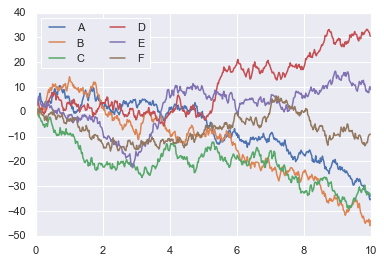

In [67]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## 4.16.2 Seaborn图形介绍

**Matplotlib就是Seaborn的底层**

1. 频次直方图，KDE和密度图

In [68]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

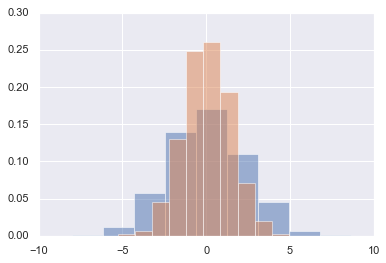

In [70]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

除了频次直方图，我们还可以用KDE(核密度估计图)获取变量分布的平滑估计。

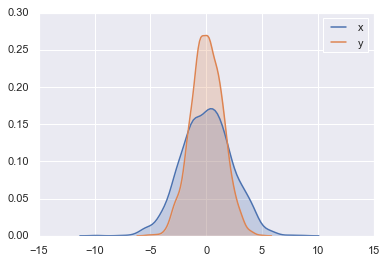

In [72]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

用displot可以让频次直方图与KDE结合起来

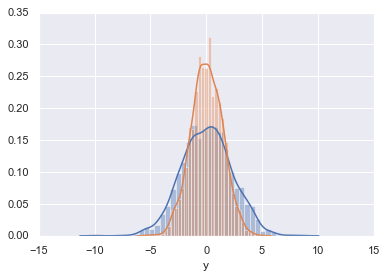

In [75]:
sns.distplot(data['x'])
sns.distplot(data['y'])

如果向kdeplot输入的是二维数据集，那么就可以获得一个二维数据的可视化图：

d:\python35\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


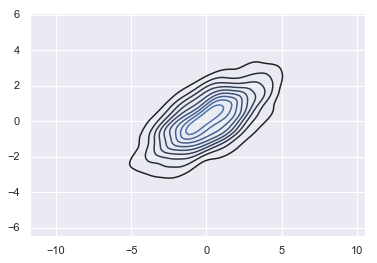

In [76]:
sns.kdeplot(data)

用sns.jointplot可以同时看到两个变量的联合分布与单变量的独立分布。

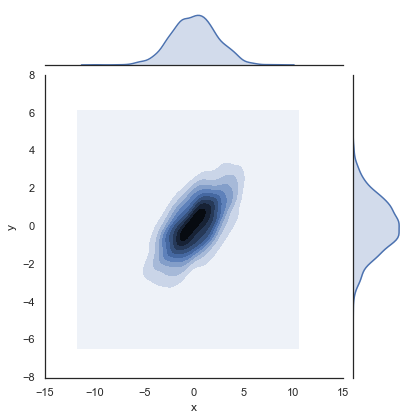

In [77]:
with sns.axes_style('white'):
    sns.jointplot("x", 'y', data, kind='kde')

可以用六边形块代替频次直方图

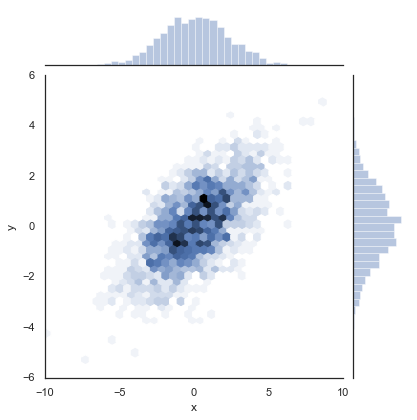

In [82]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

2. 矩阵图

In [2]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


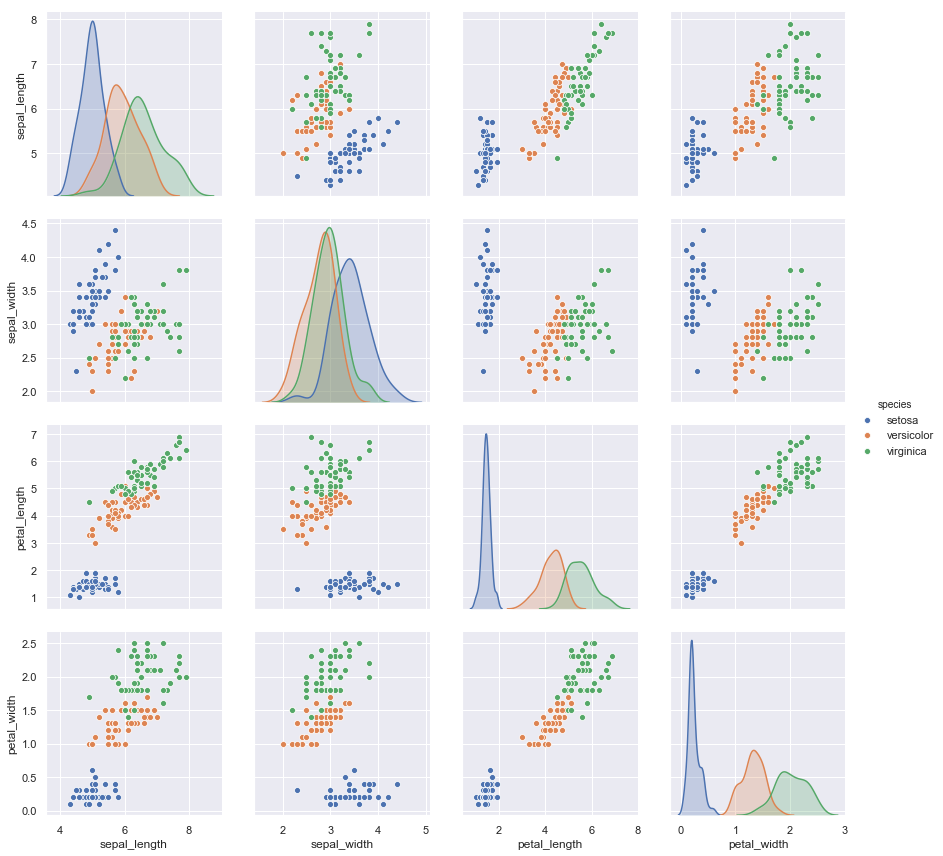

In [9]:
sns.pairplot(iris, hue='species', height=3)

3. 分面频次直方图

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


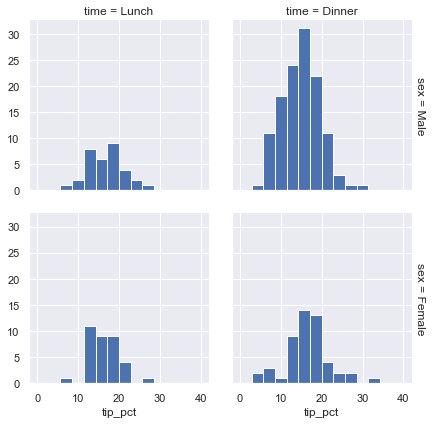

In [14]:
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

4. 因子图(函数名从factorplot变成catplot)

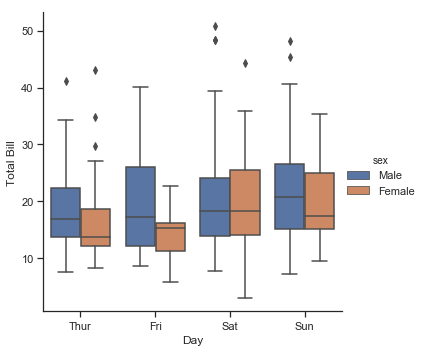

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

5. 联合分布

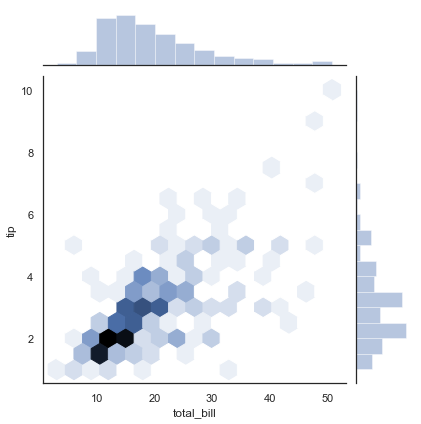

In [17]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

联合分布图也可以自动进行KDE和回归

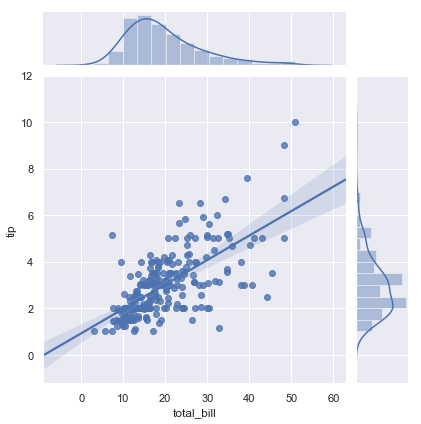

In [18]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

6. 条形图

In [19]:
plants = sns.load_dataset('planets')

In [20]:
plants.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


参数aspect的含义是：图长：宽的值。

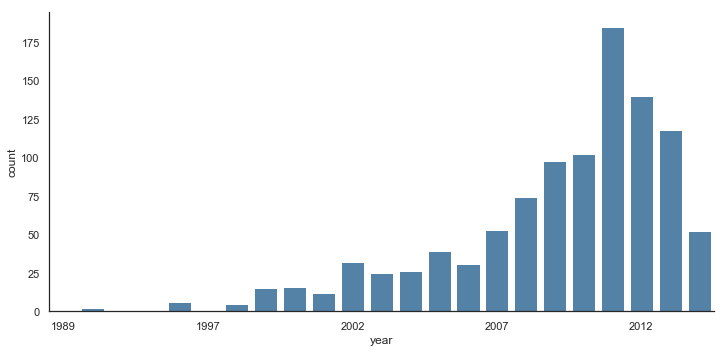

In [35]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=plants, aspect=2, kind="count", color="steelblue")
    g.set_xticklabels(step=5)

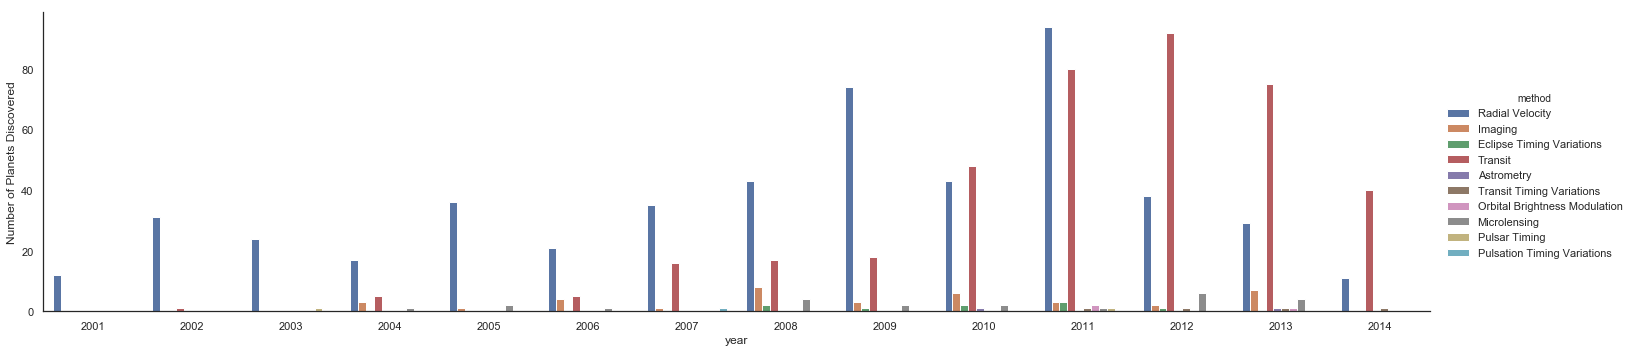

In [36]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=plants, aspect=4.0, kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## 4.16.3 案例：探索马拉松比赛成绩数据

In [37]:
import pandas as pd

In [38]:
data = pd.read_csv('./data/marathon-data.csv')

In [39]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [40]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

把字符串时间转换为时间类型的函数

map: 会根据提供的函数对指定序列做映射。

In [52]:
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return pd.Timedelta(hours=h, minutes=m, seconds=s)

In [53]:
data = pd.read_csv('./data/marathon-data.csv', converters={'split': convert_time, 'final': convert_time})

In [54]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [56]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [62]:
def transfor_time(tt):
    return tt.total_seconds()

In [64]:
data['split_sec'] = data['split'].apply(transfor_time)
data['final_sec'] = data['final'].apply(transfor_time)

In [65]:
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


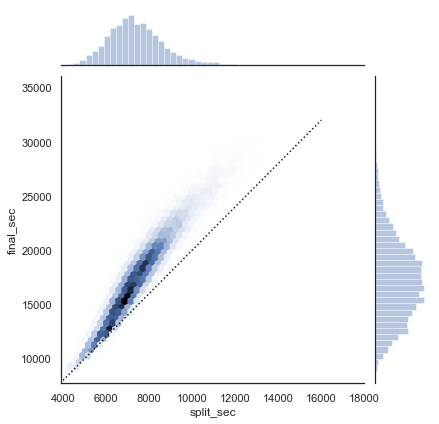

In [68]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [75]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

In [76]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


如果前后半程差异系数小于0，就表示这个人是后半程加速型选手。

绘制差异系数的分布图

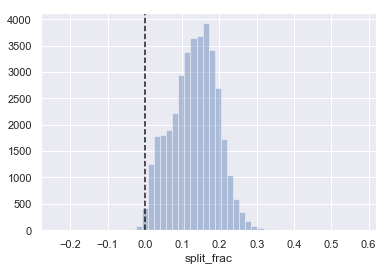

In [80]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')

In [81]:
sum(data.split_frac < 0)

251

观察前后半程差异系数与其他变量有没有相关性

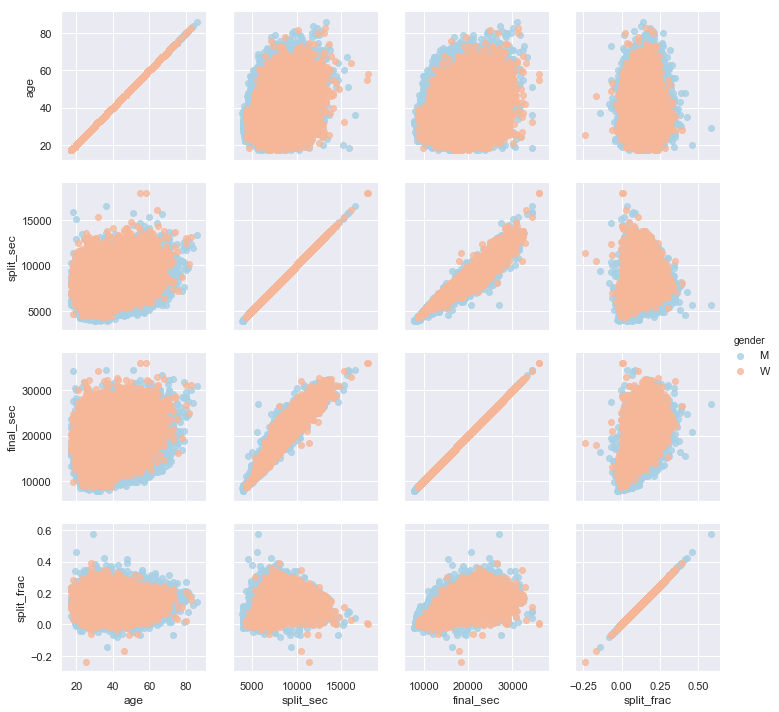

In [86]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

两组选手前后半程差异系数的频次直方图

Text(0.5,0,'split_frac')

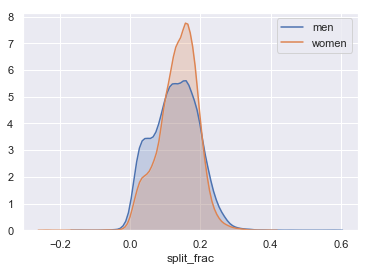

In [87]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac')

小提琴图

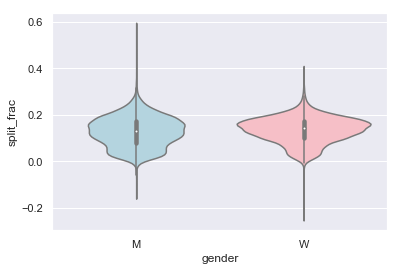

In [88]:
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"])

加入年龄段字段

In [89]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))

In [90]:
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


In [91]:
men = (data.gender == 'M')
women = (data.gender == 'W')

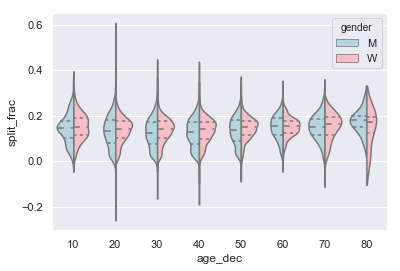

In [96]:
with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"])

In [97]:
(data.age>80).sum()

7

后半程加速选手的数据：他们都是谁？前后半程差异系数与比赛成绩正相关吗？

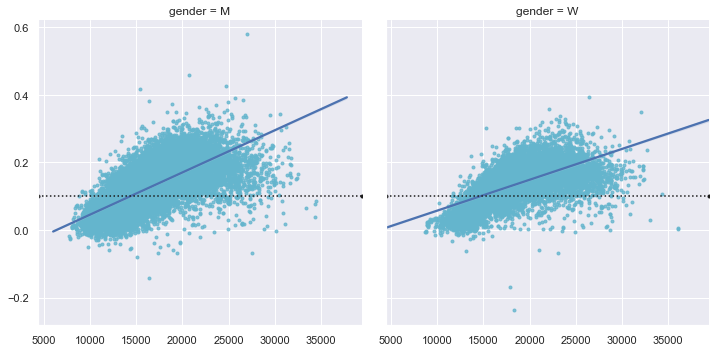

In [112]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers='.', scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")
# g.add_legend()

g.map()对g中所有的子图绘制同样的操作